In [37]:
import pandas as pd

In [38]:
df = pd.read_csv('./Cleaned.csv')
df.rename(columns={'Unnamed: 0':'Paper'}, inplace=True)
col_num = df.columns.get_loc("Link.1")
# remove columns from Link.1 to the end
df = df.iloc[:, :col_num]
print(f"length before dropping NA: {len(df)}")
df = df.dropna(thresh=10) 
print(f"length after dropping NA: {len(df)}")


length before dropping NA: 60
length after dropping NA: 55


In [39]:
# If N in Code Available, make it No 
df['Code Available?'] = ['No' if 'n' in str(x).lower() else x for x in df['Code Available?']]
df['Hyperparameters Reported?'] = df['Hyperparameters Reported?'].str.strip()

# Getting the Ratios

In [56]:
# ratio of code available to not

def get_ratio(df, column_name):
    available_count = len(df[df[column_name] == 'Yes'])
    unavailable_count = len(df) - available_count
    ratio = available_count / len(df) if len(df) > 0 else 0
    return ratio


print(f'Ratio of Code Available: {get_ratio(df, "Code Available?")}')
print(f'Ratio of Hyperparameters Reported: {get_ratio(df, "Hyperparameters Reported?")}')
print(f'Ratio of Papers that used Public Datasets:{len(df["Public Dataset"].dropna())/(len(df))}')
print(f'Ratio of Papers that used OhioT1DM:{len(df[df["Public Dataset"] == "OhioT1DM"])/(len(df))}')
print(f'Ratio of Papers that reported 30: {len(df[df["Best reported prediction horizon"] == "30"])/(len(df))}')
# ratio fo parameter

# split the below thing and select the first one
df_30 = df[df["Best reported prediction horizon"] == "30"]

# convert to int
df_30.loc[:, 'Best reported metric'] = df_30['Best reported metric'].astype(float)
range_of_result = f'{df_30["Best reported metric"].min()} - {df_30["Best reported metric"].max()}'
print(f'Range of Best reported metric range: {range_of_result}')

Ratio of Code Available: 0.2
Ratio of Hyperparameters Reported: 0.6545454545454545
Ratio of Papers that used Public Datasets:0.8
Ratio of Papers that used OhioT1DM:0.4727272727272727
Ratio of Papers that reported 30: 0.7818181818181819
Range of Best reported metric range: 3.03 - 28.91


## Creating the Plots
Code Availability

Text(0.5, 1.0, 'Code Availability')

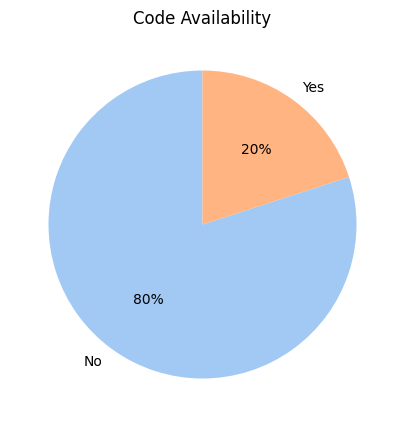

In [45]:
import seaborn as sns 
import matplotlib.pyplot as plt
# set pallette to pastel
sns.set_palette("pastel")
# pie chart of code availability

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
y = df['Code Available?'].value_counts()
ax.pie(y, labels=y.index, autopct='%1.0f%%', startangle=90)
ax.set_title('Code Availability')


Status of the datasets

In [46]:
df['Status'] = df.apply(
    lambda x: 'Both' if pd.notna(x['Public Dataset']) and pd.notna(x['Private Dataset']) 
    else 'Public' if pd.notna(x['Public Dataset']) 
    else 'Private' if pd.notna(x['Private Dataset']) 
    else 'Unknown', 
    axis=1
)


Text(0.5, 1.0, 'Status of Datasets')

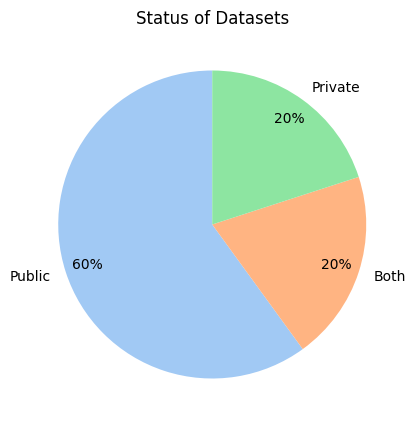

In [47]:
import seaborn as sns 
import matplotlib.pyplot as plt

# pie chart of code availability

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

y = df['Status'].value_counts()
def autopct_format(pct):
    return ('%1.0f%%' % pct) if pct > 3 else ('%1.0f%%' % pct)

ax.pie(y, labels=y.index, autopct=autopct_format, startangle=90, pctdistance=0.85, labeldistance=1.1)
ax.set_title('Status of Datasets')

# don't render the plot


Text(0.5, 1.0, 'Hyperparameters Reported?')

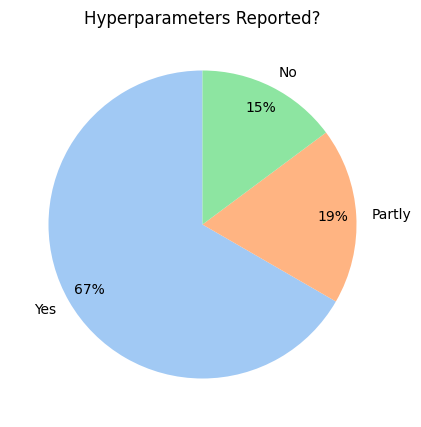

In [48]:
import seaborn as sns 
import matplotlib.pyplot as plt

# Pie chart of code availability
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

y = df['Hyperparameters Reported?'].value_counts()
# Convert to percentages
y = y / y.sum() * 100

# Adjust pctdistance so labels stay within the slice
ax.pie(y, labels=y.index, autopct='%1.0f%%', startangle=90, pctdistance=0.85)
ax.set_title('Hyperparameters Reported?')


['30' '30' '30' '30' '30' '30' '30' '30' '30' '30' 'nan' '30' '30' '30'
 '30' '30' '60' '30' '30' 'nan' '30' '30' '30' '60' '30' '30' '120' '15'
 '30' '30' '30' '30' 'nan' '30' '30' '30' '60' '30' '30' '30' '30 (APE)'
 '30' '30' '30' '30' '30' '30' 'NAN' '30' '30' '30' 'nan' '30' '30'
 '120 (R)']


Text(0.5, 1.0, 'Reported Prediction Horizon (30 min priority)')

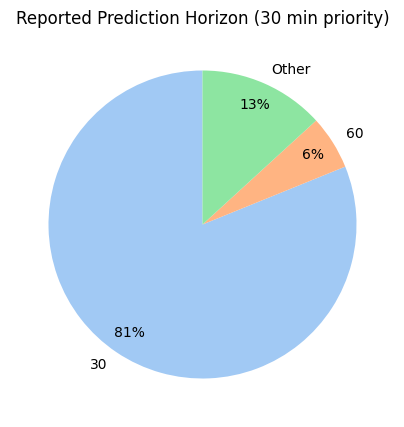

In [49]:
# pie chart of best reported sampling horizon

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

y = df['Best reported prediction horizon'].astype(str).values
print(y)
# split on the comma
y = pd.Series([x.split(' ')[0] for x in y if len(x) <= 3])
y = y.str.strip()
# get the value counts
y = y.value_counts()

# merge the ones with 1 count into a single category
y.loc['Other'] = y[y == 1].sum()
y = y[y > 1]
y['Other'] = y['Other']  + y['nan']

# drop nan
y = y.drop('nan', errors='ignore')

# Convert to percentages
y = y / y.sum() * 100

ax.pie(y, labels=y.index, autopct=lambda p: f'{p:.0f}%', startangle=90, pctdistance=0.85)
ax.set_title('Reported Prediction Horizon (30 min priority)')

# don't render the plot



Bar Charts for Datasets

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Process public Dataset
public_Dataset = df['Public Dataset'].dropna().str.split(',').explode().str.strip()
public_Dataset = public_Dataset.value_counts().reset_index()
public_Dataset.columns = ['Databases', 'Count']

# Group all counts of 1 into "Other"
public_Dataset.loc[public_Dataset['Count'] == 1, 'Databases'] = 'Other'
public_Dataset = public_Dataset.groupby('Databases', as_index=False).sum()

# Rename Soonchunhyang dataset to SCH for better labelling
df['Public Dataset'] = df['Public Dataset'].apply(lambda x: x.strip().replace('Soonchunhyang University Cheonan', 'SCH') if isinstance(x, str) else x)
df['Private Dataset'] = df['Private Dataset'].apply(lambda x: x.strip().replace('Soonchunhyang University Cheonan', 'SCH') if isinstance(x, str) else x)

# Process private Dataset
private_Dataset = df['Private Dataset'].dropna().str.split(',').explode().str.strip()

# Remove empty strings if any
private_Dataset = private_Dataset[private_Dataset != '']

# Aggregate private Dataset into one category
private_Dataset_counts = pd.DataFrame({
    'Databases': ['Private', 'Simulated'],
    'Count': [private_Dataset[~private_Dataset.isin(['UVA/Padova', 'AIDA', 'D1NAMO'])].count(), private_Dataset[private_Dataset.isin(['UVA/Padova', 'AIDA', 'D1NAMO'])].count()]
})

# Merge public and private Dataset
merged_Dataset = pd.concat([public_Dataset, private_Dataset_counts], ignore_index=True)



In [51]:
len(private_Dataset)

27

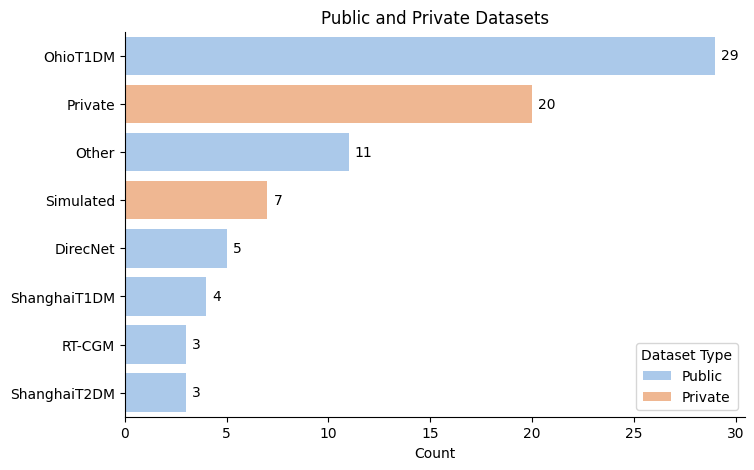

In [52]:

# Sort merged_Dataset by Count in descending order
merged_Dataset = merged_Dataset.sort_values(by='Count', ascending=False).reset_index(drop=True)

# Plot bar chart
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=merged_Dataset, x='Count', y='Databases', hue=merged_Dataset['Databases'].isin(['Private', 'Simulated']).map({True: 'Private', False: 'Public'}))

# Add text labels
for i, v in enumerate(merged_Dataset['Count']):
    plt.text(v + 0.3, i, str(v), color='black', va='center')

sns.despine()
plt.xlabel("Count")
plt.ylabel("")
plt.title("Public and Private Datasets")
plt.legend(title="Dataset Type")

plt.show()


In [53]:
# # get the best reported metric for 
# # df
# # if "simulator" not in df['best_reported_metric'].str.lower():



# # df.dropna(subset=['Public Dataset'], inplace=True)
# ndf = df.dropna(subset=['Public Dataset'])

# non_simulated_brm = ndf[~ndf['Public Dataset'].str.lower().str.contains('simulator')]

# non_simulated_brm = non_simulated_brm[non_simulated_brm['best_reported_sh'] == '30']['best_reported_metric'].value_counts()
# non_simulated_brm = non_simulated_brm.reset_index()
# non_simulated_brm.columns = ['Metric', 'Count']
# # convert Metric to numeric
# non_simulated_brm['Metric'] = pd.to_numeric(non_simulated_brm['Metric'], errors='coerce')


# best_reported_metric = df[df['best_reported_sh'] == '30']['best_reported_metric'].value_counts()
# best_reported_metric.to_frame().reset_index()
# best_reported_metric = best_reported_metric.reset_index()
# best_reported_metric.columns = ['Metric', 'Count']
# # convert Metric to numeric
# best_reported_metric['Metric'] = pd.to_numeric(best_reported_metric['Metric'], errors='coerce')




In [54]:
# drop NAN
best_reported_metric = best_reported_metric.dropna()
non_simulated_brm = non_simulated_brm.dropna()

NameError: name 'best_reported_metric' is not defined

33


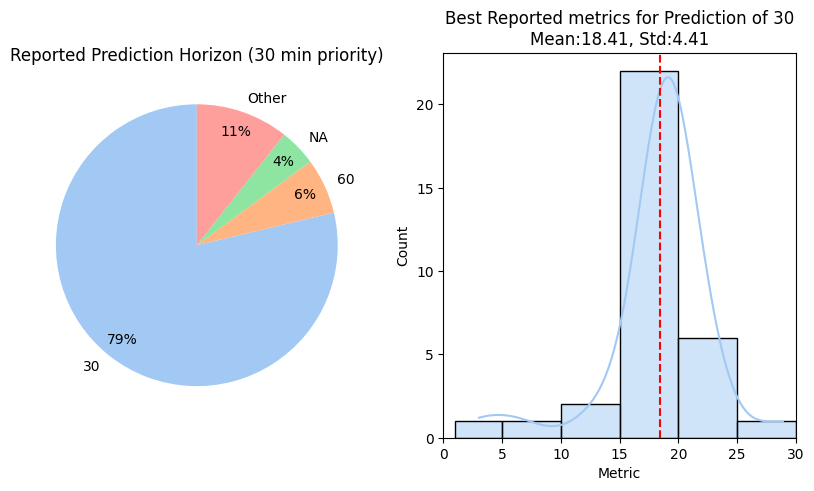

In [ ]:
# plot the best_reported_sh
non_simul_df = df[~df['Public Datasets'].str.lower().str.contains('simulator', na=False)]
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# plot a histogram of best reported metric with custom bins
custom_bins = [1, 5, 10, 15, 20, 25, 30]
sns.histplot(data=non_simulated_brm, x='Metric', bins=custom_bins, kde=True, ax=ax[1])

print(len(non_simulated_brm))
ax[1].set_title('Best Reported metrics for Prediction of 30\nMean:{:.2f}, Std:{:.2f}'.format(
    non_simulated_brm['Metric'].mean(), 
    non_simulated_brm['Metric'].std()))

# draw line on mean
ax[1].axvline(non_simulated_brm['Metric'].mean(), color='red', linestyle='--')

# Set x-axis limits to better visualize the data
ax[1].set_xlim(0, 30)

# Plot the best reported sampling horizon on ax[0]
y = non_simul_df['best_reported_sh'].values
y = pd.Series([i for x in y for i in x.split(',')])
y = y.str.strip()
y = y.value_counts()
y.loc['Other'] = y[y == 1].sum()
y = y[y > 1]
y = y / y.sum() * 100

ax[0].pie(y, labels=y.index, autopct=lambda p: f'{p:.0f}%', startangle=90, pctdistance=0.85)
ax[0].set_title('Reported Prediction Horizon (30 min priority)')

plt.show()

In [ ]:
y

30       81.132075
60        5.660377
NA        3.773585
Other     9.433962
Name: count, dtype: float64

30       81.132075
60        5.660377
NA        3.773585
Other     9.433962
Name: count, dtype: float64

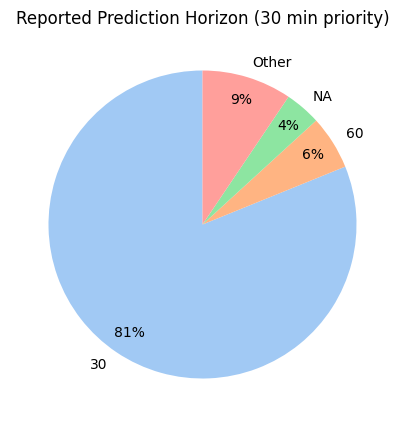

In [ ]:
# pie chart of best reported sampling horizon

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

y = df['best_reported_sh'].values
# split on the comma
y = pd.Series([i for x in y for i in x.split(',')])
y = y.str.strip()
# get the value counts
y = y.value_counts()

# merge the ones with 1 count into a single category
y.loc['Other'] = y[y == 1].sum()
y = y[y > 1]

# Convert to percentages
y = y / y.sum() * 100

ax.pie(y, labels=y.index, autopct=lambda p: f'{p:.0f}%', startangle=90, pctdistance=0.85)
ax.set_title('Reported Prediction Horizon (30 min priority)')

# don't render the plot

y